# "Earthquake STATUS Prediction" 1965-2016

QUEREMOS PREDECIR SI UN TERREMOTO HA ESTADO CATALOGADO DE FORMA AUTOMÁTICA O DE FORMA REVISADA

USAMOS KERAS COMO ALGORITMO DE DEEP LEARNING PARA HACER LA PREDICCIÓN 

In [45]:
import numpy as np # soporte para matrices y matrices de alta dimensión, manipulación numérica en Python.
import pandas as pd # ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
import matplotlib.pyplot as plt # para la visualización de datos en Python
import seaborn as sns # para la visualización de datos en Python

from sklearn.preprocessing import StandardScaler # para el preprocesamiento de datos
from sklearn.model_selection import train_test_split # permite dividir arrays o matrices de datos en subconjuntos aleatorios de entrenamiento y prueba

import tensorflow as tf # biblioteca de código abierto para aprendizaje automático y aprendizaje profundo

In [46]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [47]:
data = pd.read_csv('database.csv')

In [48]:
data

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square            ID  Source  \
0                   NaN               NaN  ISCGEM860706  ISCGEM   
1                   NaN               NaN  ISCGEM860737  ISCGEM   
2                   NaN               NaN  ISCGEM860762  ISCGEM   
3                   NaN               NaN  ISCGEM860856  ISCGEM   
4                   NaN               NaN  ISCGEM860890  ISCGEM   
...                 ...               ...           ...     ...   
23407               NaN            0.1898    NN00570710      NN   
23408               NaN            0.2187    NN00570744      NN   
23409               4.8            1.5200    US10007NAF      US   
23410               6.0            1.4300    US10007NL0      US   
23411               4.5            0.9100    US10007NTD      US   

      Location Source Magnitude Source     Status  
0              ISCGEM           ISCGEM  Automatic  
1              ISCGEM           ISCGEM  Automatic  
2              ISCGEM           ISCGEM  Automatic  
3              ISCGEM           ISCGEM  Automatic  
4              ISCGEM           ISCGEM  Automatic  
...               ...              ...        ...  
23407              NN               NN   Reviewed  
23408              NN               NN   Reviewed  
23409              US               US   Reviewed  
23410              US

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# PREPROCESSING

In [50]:
data = data.drop('ID', axis = 1)

In [51]:
data.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [52]:
null_columns = data.loc[:, data.isna().sum() > 0.66 * data.shape[0]].columns

In [53]:
data = data.drop(null_columns, axis = 1)

In [54]:
data.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [55]:
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [56]:
data = data.dropna(axis = 0).reset_index(drop = True)

In [57]:
data.isna().sum().sum()

0

# FEATURE ENGINEERING

In [58]:
data

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23404  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23405  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23406  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23407  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23408  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Magnitude Magnitude Type  Root Mean Square  Source Location Source  \
0            6.0             MW          1.022784  ISCGEM          ISCGEM   
1            5.8             MW          1.022784  ISCGEM          ISCGEM   
2            6.2             MW          1.022784  ISCGEM          ISCGEM   
3            5.8             MW          1.022784  ISCGEM          ISCGEM   
4            5.8             MW          1.022784  ISCGEM          ISCGEM   
...          ...            ...               ...     ...             ...   
23404        5.6             ML          0.189800      NN              NN   
23405        5.5             ML          0.218700      NN              NN   
23406        5.9            MWW          1.520000      US              US   
23407        6.3            MWW          1.430000      US              US   
23408        5.5             MB          0.910000      US              US   

      Magnitude Source     Status  
0               ISCGEM  Automatic  
1               ISCGEM  Automatic  
2               ISCGEM  Automatic  
3               ISCGEM  Automatic  
4               ISCGEM  Automatic  
...                ...        ...  
23404               NN   Reviewed  
23405               NN   Reviewed  
23406               US   Reviewed  
23407               US   Reviewed  
23408               US   Reviewed  

[23409 rows x 13 columns]

In [59]:
data['Month'] = data['Date'].apply(lambda x: x[0:2])
data['Year'] = data['Date'].apply(lambda x: x[-4:])

data = data.drop('Date', axis = 1)

In [60]:
data['Month'] = data['Month'].astype(int)

In [62]:
data[data['Year'].str.contains('Z')]

Time  Latitude  Longitude        Type  Depth  \
3378   1975-02-23T02:58:41.000Z     8.017    124.075  Earthquake  623.0   
7510   1985-04-28T02:53:41.530Z   -32.998    -71.766  Earthquake   33.0   
20647  2011-03-13T02:23:34.520Z    36.344    142.344  Earthquake   10.1   

       Magnitude Magnitude Type  Root Mean Square Source Location Source  \
3378         5.6             MB          1.022784     US              US   
7510         5.6             MW          1.300000     US              US   
20647        5.8            MWC          1.060000     US              US   

      Magnitude Source    Status  Month  Year  
3378                US  Reviewed     19  000Z  
7510               HRV  Reviewed     19  530Z  
20647             GCMT  Reviewed     20  520Z

In [63]:
invalid_year_indices = data[data['Year'].str.contains('Z')].index

data = data.drop(invalid_year_indices, axis=0).reset_index(drop=True)

In [64]:
data['Year'] = data['Year'].astype(int)

In [65]:
data['Hour'] = data['Time'].apply(lambda x: int(x[0:2]))

data = data.drop('Time', axis=1)

In [66]:
data

Latitude  Longitude        Type   Depth  Magnitude Magnitude Type  \
0       19.2460   145.6160  Earthquake  131.60        6.0             MW   
1        1.8630   127.3520  Earthquake   80.00        5.8             MW   
2      -20.5790  -173.9720  Earthquake   20.00        6.2             MW   
3      -59.0760   -23.5570  Earthquake   15.00        5.8             MW   
4       11.9380   126.4270  Earthquake   15.00        5.8             MW   
...         ...        ...         ...     ...        ...            ...   
23401   38.3917  -118.8941  Earthquake   12.30        5.6             ML   
23402   38.3777  -118.8957  Earthquake    8.80        5.5             ML   
23403   36.9179   140.4262  Earthquake   10.00        5.9            MWW   
23404   -9.0283   118.6639  Earthquake   79.00        6.3            MWW   
23405   37.3973   141.4103  Earthquake   11.94        5.5             MB   

       Root Mean Square  Source Location Source Magnitude Source     Status  \
0              1.022784  ISCGEM          ISCGEM           ISCGEM  Automatic   
1              1.022784  ISCGEM          ISCGEM           ISCGEM  Automatic   
2              1.022784  ISCGEM          ISCGEM           ISCGEM  Automatic   
3              1.022784  ISCGEM          ISCGEM           ISCGEM  Automatic   
4              1.022784  ISCGEM          ISCGEM           ISCGEM  Automatic   
...                 ...     ...             ...              ...        ...   
23401          0.189800      NN              NN               NN   Reviewed   
23402          0.218700      NN              NN               NN   Reviewed   
23403          1.520000      US              US               US   Reviewed   
23404          1.430000      US              US               US   Reviewed   
23405          0.910000      US              US               US   Reviewed   

       Month  Year  Hour  
0          1  1965    13  
1          1  1965    11  
2          1  1965    18  
3          1  1965    18  
4          1  1965    13  
...      ...   ...   ...  
23401     12  2016     8  
23402     12  2016     9  
23403     12  2016    12  
23404     12  2016    22  
23405     12  2016    20  

[23406 rows x 14 columns]

In [67]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [68]:
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)

# VISUALIZATION

In [71]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object']
# Este fragmento de código crea una lista llamada numeric_columns que contiene los nombres de las columnas en 
# el DataFrame data que tienen tipos de datos numéricos.

In [72]:
corr = data[numeric_columns].corr()

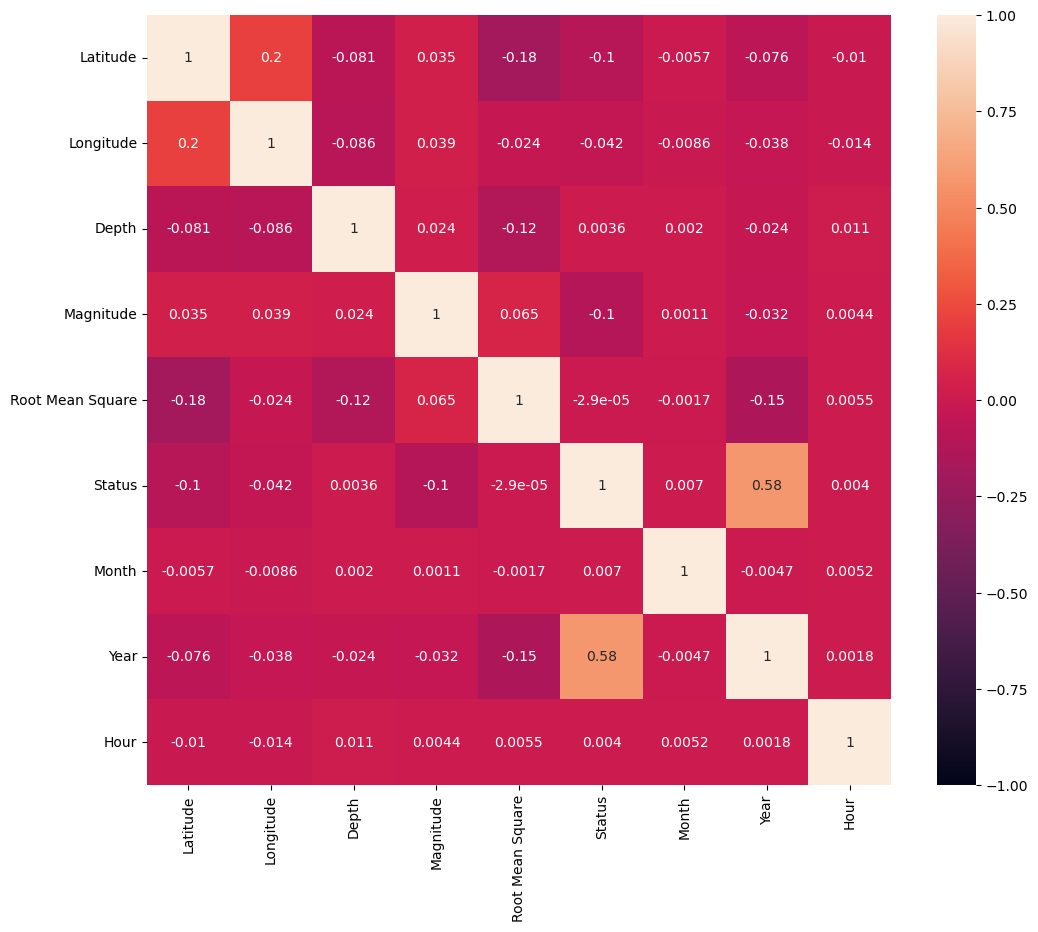

In [73]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, vmin=-1.0, vmax=1.0)
plt.show()

In [74]:
# Observem que el STATUS augmenta de forma directament proporcional amb l'any.
# És lògic ja que com més actual és el terratrèmol, millor és el "status (fiabilitat i precisió)"

In [75]:
numeric_columns.remove('Status')

In [76]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns=numeric_columns)


/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_68187/3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_68187/3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_68187/3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_68187/3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor

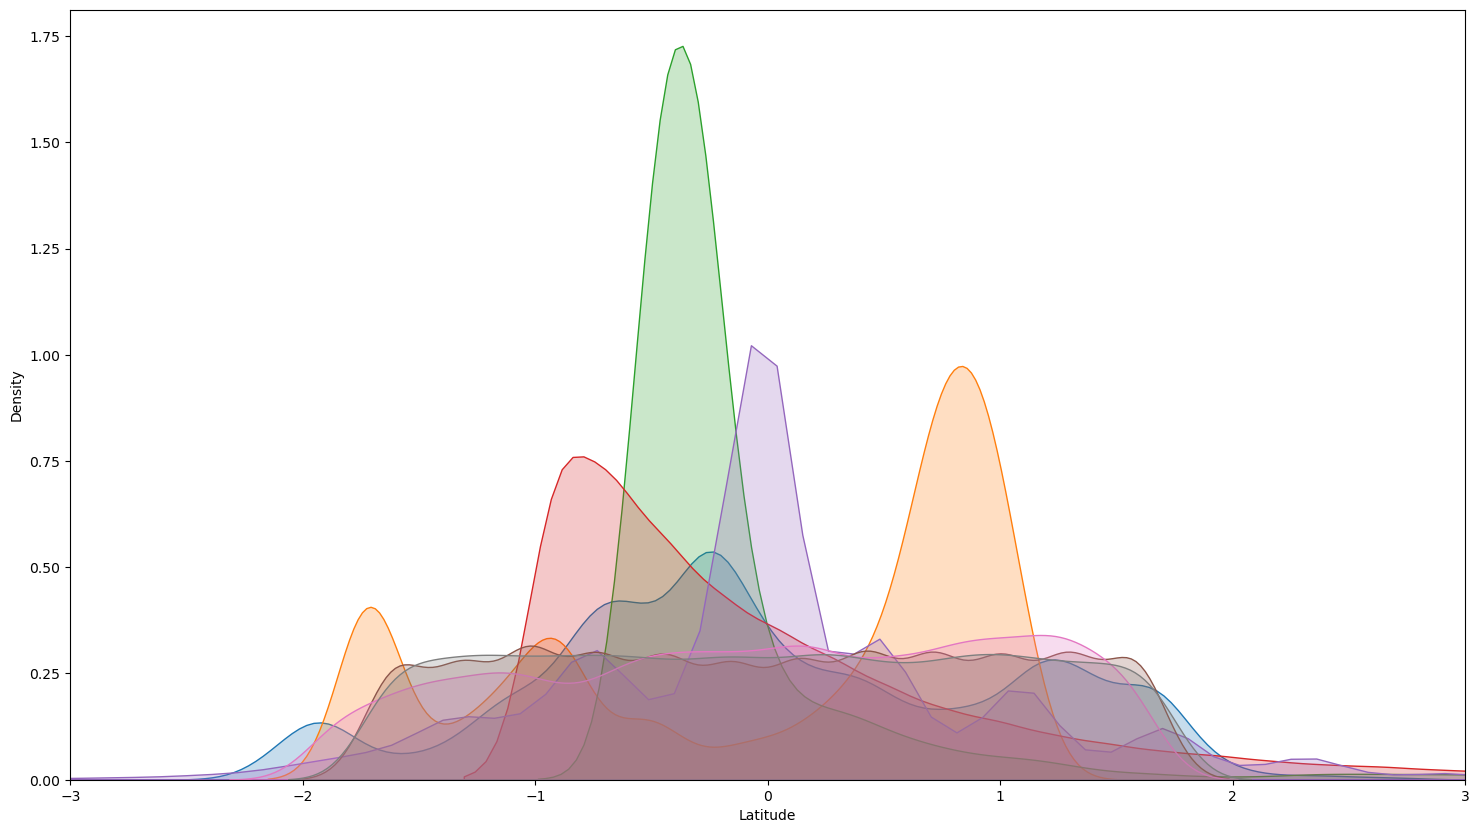

In [77]:
plt.figure(figsize=(18, 10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], shade=True)
plt.xlim(-3, 3)
plt.show()

# ENCODING

En el contexto del machine learning, "encoding" se refiere a la transformación de datos crudos (como texto, categorías, o imágenes) en un formato estructurado y numérico que los modelos de aprendizaje automático pueden entender y procesar. Dado que la mayoría de los algoritmos de machine learning requieren entrada numérica, la codificación es un paso crucial en la preparación de datos que impacta directamente en el rendimiento y la eficacia del modelo.

In [78]:
data

Latitude  Longitude        Type   Depth  Magnitude Magnitude Type  \
0       19.2460   145.6160  Earthquake  131.60        6.0             MW   
1        1.8630   127.3520  Earthquake   80.00        5.8             MW   
2      -20.5790  -173.9720  Earthquake   20.00        6.2             MW   
3      -59.0760   -23.5570  Earthquake   15.00        5.8             MW   
4       11.9380   126.4270  Earthquake   15.00        5.8             MW   
...         ...        ...         ...     ...        ...            ...   
23401   38.3917  -118.8941  Earthquake   12.30        5.6             ML   
23402   38.3777  -118.8957  Earthquake    8.80        5.5             ML   
23403   36.9179   140.4262  Earthquake   10.00        5.9            MWW   
23404   -9.0283   118.6639  Earthquake   79.00        6.3            MWW   
23405   37.3973   141.4103  Earthquake   11.94        5.5             MB   

       Root Mean Square  Source Location Source Magnitude Source  Status  \
0              1.022784  ISCGEM          ISCGEM           ISCGEM       0   
1              1.022784  ISCGEM          ISCGEM           ISCGEM       0   
2              1.022784  ISCGEM          ISCGEM           ISCGEM       0   
3              1.022784  ISCGEM          ISCGEM           ISCGEM       0   
4              1.022784  ISCGEM          ISCGEM           ISCGEM       0   
...                 ...     ...             ...              ...     ...   
23401          0.189800      NN              NN               NN       1   
23402          0.218700      NN              NN               NN       1   
23403          1.520000      US              US               US       1   
23404          1.430000      US              US               US       1   
23405          0.910000      US              US               US       1   

       Month  Year  Hour  
0          1  1965    13  
1          1  1965    11  
2          1  1965    18  
3          1  1965    18  
4          1  1965    13  
...      ...   ...   ...  
23401     12  2016     8  
23402     12  2016     9  
23403     12  2016    12  
23404     12  2016    22  
23405     12  2016    20  

[23406 rows x 14 columns]

In [79]:
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [80]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [81]:
data = onehot_encode(
    data,
    ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
    ['t', 'mt', 's', 'ls', 'ms']
)

In [82]:
data

Latitude  Longitude   Depth  Magnitude  Root Mean Square  Status  \
0       19.2460   145.6160  131.60        6.0          1.022784       0   
1        1.8630   127.3520   80.00        5.8          1.022784       0   
2      -20.5790  -173.9720   20.00        6.2          1.022784       0   
3      -59.0760   -23.5570   15.00        5.8          1.022784       0   
4       11.9380   126.4270   15.00        5.8          1.022784       0   
...         ...        ...     ...        ...               ...     ...   
23401   38.3917  -118.8941   12.30        5.6          0.189800       1   
23402   38.3777  -118.8957    8.80        5.5          0.218700       1   
23403   36.9179   140.4262   10.00        5.9          1.520000       1   
23404   -9.0283   118.6639   79.00        6.3          1.430000       1   
23405   37.3973   141.4103   11.94        5.5          0.910000       1   

       Month  Year  Hour  t_Earthquake  ...  ms_NN  ms_OFFICIAL  ms_PAR  \
0          1  1965    13             1  ...      0            0       0   
1          1  1965    11             1  ...      0            0       0   
2          1  1965    18             1  ...      0            0       0   
3          1  1965    18             1  ...      0            0       0   
4          1  1965    13             1  ...      0            0       0   
...      ...   ...   ...           ...  ...    ...          ...     ...   
23401     12  2016     8             1  ...      1            0       0   
23402     12  2016     9             1  ...      1            0       0   
23403     12  2016    12             1  ...      0            0       0   
23404     12  2016    22             1  ...      0            0       0   
23405     12  2016    20             1  ...      0            0       0   

       ms_PGC  ms_PR  ms_SE  ms_US  ms_US_GCMT  ms_US_PGC  ms_UW  
0           0      0      0      0           0          0      0  
1           0      0      0      0           0          0      0  
2           0      0      0      0           0          0      0  
3           0      0      0      0           0          0      0  
4           0      0      0      0           0          0      0  
...       ...    ...    ...    ...         ...        ...    ...  
23401       0      0      0      0           0          0      0  
23402       0      0      0      0           0          0      0  
23403       0      0      0      1           0          0      0  
23404       0      0      0      1           0          0      0  
23405       0      0      0      1           0          0      0  

[23406 rows x 105 columns]

# SPLITTING AND SCALING

El splitting se refiere al proceso de dividir el conjunto de datos en subconjuntos separados para entrenar y evaluar el modelo de machine learning. Los dos subconjuntos más comunes son:

Conjunto de entrenamiento (Training set): Este conjunto de datos se utiliza para entrenar el modelo. Contiene un porcentaje del total de los datos (comúnmente entre el 70% y el 80%) y es a través de este conjunto que el modelo aprende a identificar patrones o realizar predicciones.

Conjunto de prueba (Test set): Este conjunto se utiliza para evaluar la efectividad y precisión del modelo después del entrenamiento. No se muestra al modelo durante el entrenamiento, y sirve para simular cómo se comportaría el modelo con datos nuevos o no vistos. Usualmente representa el 20%-30% restante de los datos.

El scaling se refiere al proceso de normalizar o estandarizar las características numéricas del conjunto de datos para que tengan una escala común. Esto es importante porque muchos algoritmos de machine learning son sensibles a la magnitud de los valores de entrada, y las características con escalas grandes pueden dominar aquellas con escalas menores. 

In [86]:
y = data.loc[:, 'Status'] # LO QUE QUEREMOS PREDECIR
X = data.drop('Status', axis=1)

In [87]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)

# MODELING AND TRAINING

In [92]:
X.shape

(23406, 104)

In [93]:
y.mean()

0.88737930445185

In [95]:
inputs = tf.keras.Input(shape=(104,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

# RESULTS

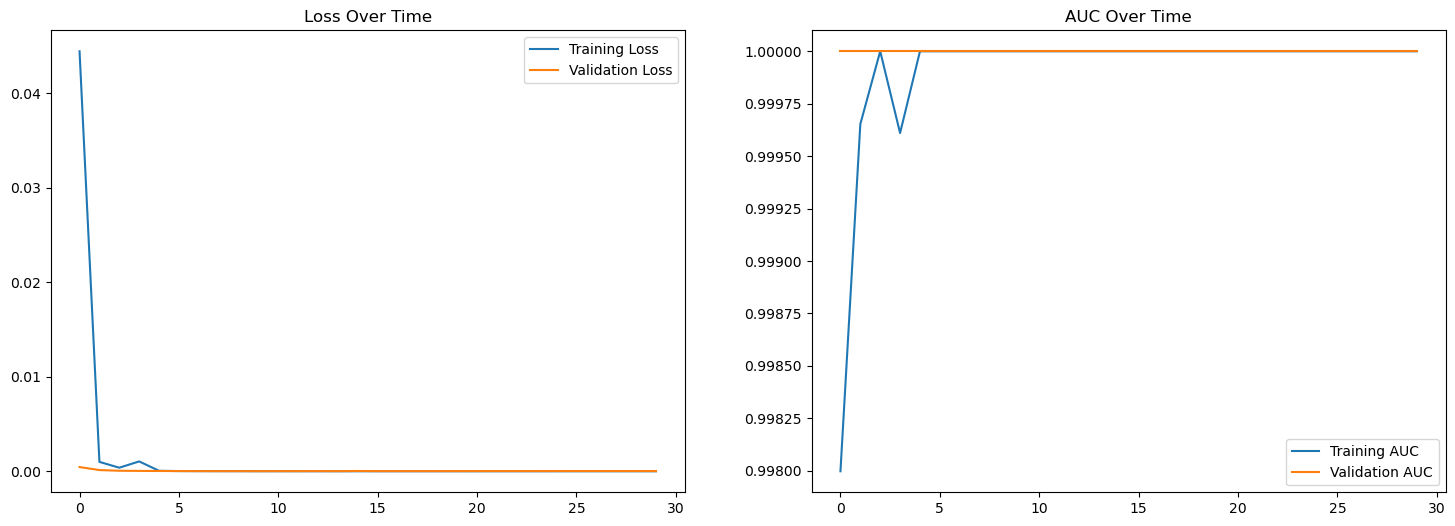

In [96]:
plt.figure(figsize=(18, 6))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss Over Time")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.legend()
plt.title("AUC Over Time")

plt.show()

In [97]:
model.evaluate(X_test, y_test) 

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 1.0000 - loss: 1.2625e-04


[0.00023006896662991494, 1.0]

El resultado `[0.00023006896662991494, 1.0]` que obtienes después de llamar a `model.evaluate(X_test, y_test)` representa la métrica de rendimiento calculada por el modelo en el conjunto de datos de prueba. Por lo general, este resultado consiste en una lista de valores, donde cada valor representa una métrica específica de rendimiento.

En tu caso, hay dos valores en la lista:

1. El primer valor, `0.00023006896662991494`, probablemente representa la pérdida calculada por el modelo en el conjunto de datos de prueba. Esta pérdida es una medida de cuán bien se ajustan las predicciones del modelo a las etiquetas de clase reales. En este caso, la pérdida es extremadamente baja, lo que sugiere que el modelo hace predicciones muy cercanas a las etiquetas de clase reales.

2. El segundo valor, `1.0`, probablemente representa la precisión del modelo en el conjunto de datos de prueba. La precisión es una medida de cuán precisas son las predicciones del modelo en comparación con las etiquetas de clase reales. Un valor de `1.0` indica una precisión perfecta, lo que significa que todas las predicciones del modelo coinciden con las etiquetas de clase reales en el conjunto de datos de prueba.

En resumen, el resultado `[0.00023006896662991494, 1.0]` sugiere que el modelo tiene una pérdida muy baja y una precisión perfecta en el conjunto de datos de prueba, lo que indica que el modelo está haciendo predicciones extremadamente precisas.

In [98]:
len(y_test)

7022